# FYP 01

## Installing Packages

In [ ]:
#@title
# Install rdkit # Enforce pytorch version 1.6.0   while True:pass  # saver  import pdb; pdb.set_trace()

import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO
 
 
logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)
 
 
def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """
 
    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )
 
    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)
 
    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return
 
        logger.info("force re-install")
 
    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)
 
    logger.info("python version: {}".format(python_version))
 
    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)
 
    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')
 
    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')
 
    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python==3.7.3",
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")
 
    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))
 
 
if __name__ == "__main__":
    install()

add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.12
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.09.1 installation finished!


In [ ]:
# If something breaks in the notebook it is probably related to a mismatch between the Python version, CUDA or torch
import torch
pytorch_version = f"torch-{torch.__version__}+cu{torch.version.cuda.replace('.', '')}.html"
!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/$pytorch_version
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111+cu111.html
ERROR: Could not find a version that satisfies the requirement torch-scatter (from versions: none)
ERROR: No matching distribution found for torch-scatter
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111+cu111.html
ERROR: Could not find a version that satisfies the requirement torch-sparse (from versions: none)
ERROR: No matching distribution found for torch-sparse
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111+cu111.html
ERROR: Could not find a version that satisfies the requirement torch-cluster (from versions: none)
ERROR: No matching distribution found for torch-cluster
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111+cu111.html
ERROR: Could not find a version that satisfies the requirement torch-spline-conv (from versions: none)
ERROR: No matching distribution found for torch-spline-conv
     |████████████████████████████████| 370 kB

In [ ]:
! pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
! pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html
! pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 7.9 MB 5.0 MB/s 
Looking in links: https://data.pyg.org/whl/torch-1.10.0+cu111.html
     |████████████████████████████████| 3.5 MB 12.2 MB/s 


In [ ]:
! pip install pubchempy

  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=306a5c5211b4d3827f4afcf4756fada34a6dd2118010598185086e07d1c6fea5
  Stored in directory: /root/.cache/pip/wheels/7c/3d/8c/8192697412e9899dc55bbbb08bbc1197bef333caaa2a71c448
Successfully built pubchempy


In [ ]:
pip install molvs

     |████████████████████████████████| 61 kB 449 kB/s 
  Created wheel for molvs: filename=MolVS-0.1.1-py3-none-any.whl size=32387 sha256=1d93fe6fc9b4470d9ca502d1ea22c6fabfd52688aba8316e7d30ce1beb026964
  Stored in directory: /root/.cache/pip/wheels/c4/c2/92/e85190307603c2b3733d43e357abae2d1c66b609bfbba6200d
Successfully built molvs


### Imports

In [ ]:
import pandas as pd
import pubchempy as pcp
from collections import Counter

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

import numpy as np
from rdkit.Chem import AllChem
from rdkit import DataStructs
from molvs import standardize_smiles
import random 
import time
import networkx as nx
import csv
import math

import sys

import numpy as np
import pandas as pd
import sys, os
from random import shuffle
import torch
import torch.nn as nn
# from models.gat import GATNet
# from models.gat_gcn import GAT_GCN
# from models.gcn import GCNNet
# from models.ginconv import GINConvNet
# from utils import *
import datetime
import argparse
import nvidia_smi

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Functions

In [ ]:
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

def ctoint(_c):
  return int(str(_c)[9:-1])

def drugnameToSmiles(dn):
  return pcp.get_compounds(dn, 'name')[0].isomeric_smiles

def show_structure(sm, show_smiles = False):
  if (show_smiles):
    print(f"Smiles : {sm}")
  mol = Chem.MolFromSmiles(sm)
  return mol

def get_ecfp_sparsity(sml, fpl):       
    tmp = ECFP6(sml).compute_ECFP6(fp_length = fpl, generate_df=False) 
    return round(100*np.sum(tmp)/(tmp.shape[0]*tmp.shape[1]) , 2)

def norm_ic50(ic):
    return 1 / (1 + pow(math.exp(float(ic)), -0.1))

def denorm_ic50(ic):
    return -10*math.log((1-ic)/ic)

def predict_this(mdl, sml, cid, do_ECFP = False, fpl = None):
    cell_dict_X, cell_feature_X = save_cell_mut_matrix_XO()
    drug_dict_X, drug_smile_X, comp_smg = load_drug_smile_X(do_ECFP, fpl)

    mut_arr = cell_feature_X[cell_dict_X[str(cid)]]

    mut_arr = mut_arr.reshape(1, mut_arr.shape[0])
    sml_arr = np.array([sml])
    y_arr = np.array([0])
    smg = {sml: comp_smg[sml]}

    pr = TestbedDataset(root='', dataset="", xd=sml_arr, xt=mut_arr, y=y_arr, smile_graph=smg, testing = True).process(sml_arr, mut_arr, y_arr,smg)

    return denorm_ic50(float(mdl.forward(pr[0])[0][0][0]))

def list_difference(a, b):
    both = []
    in_a = []
    in_b = []
    if len(a) > len(b):
        for i in a:
            if i in b:
                both.append(i)
            else:
                in_a.append(i)
        for q in b:
            if q not in a:
                in_b.append(q)
    else:
        for i in b:
            if i in a:
                both.append(i)
            else:
                in_b.append(i)
        for q in a:
            if q not in b:
                in_a.append(q)
    return in_a, in_b, both

In [ ]:
def atom_features_X(atom):
    return np.array(one_of_k_encoding_unk_X(atom.GetSymbol(),['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na','Ca', 'Fe', 'As', 'Al', 'I', 'B', 'V', 'K', 'Tl', 'Yb','Sb', 'Sn', 'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn', 'H','Li', 'Ge', 'Cu', 'Au', 'Ni', 'Cd', 'In', 'Mn', 'Zr','Cr', 'Pt', 'Hg', 'Pb', 'Unknown']) +
                    one_of_k_encoding_X(atom.GetDegree(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    one_of_k_encoding_unk_X(atom.GetTotalNumHs(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    one_of_k_encoding_unk_X(atom.GetImplicitValence(), [0, 1, 2, 3, 4, 5, 6,7,8,9,10]) +
                    [atom.GetIsAromatic()])

def one_of_k_encoding_X(x, allowable_set):
    if x not in allowable_set:
        raise Exception("input {0} not in allowable set{1}:".format(x, allowable_set))
    return list(map(lambda s: x == s, allowable_set))

def one_of_k_encoding_unk_X(x, allowable_set):
    """Maps inputs not in the allowable set to the last element."""
    if x not in allowable_set:
        x = allowable_set[-1]
    return list(map(lambda s: x == s, allowable_set))

def get_ecfp_identifiers(smiles, radius):
    """
        Returns the ECFP hashed value for a given smiles
        Input:
            smiles (str) : Smiles in string format
            radius (int) : Radius of ECFP, For ECFP6 Radius = 3
        Output:
            atomIndex_hash_1 (Dictionary) : Keys - Atom index, Values - List containing radius number of hash values,  
    """
    mol = Chem.MolFromSmiles(smiles)
    bond_types = ["SINGLE", "DOUBLE", "TRIPLE", "AROMATIC"]
    atomIndex_hash_1 = {}
    
    for atom in mol.GetAtoms():
        temp = (atom.GetDegree(), atom.GetTotalValence()-atom.GetTotalNumHs(), atom.GetAtomicNum(), int(atom.GetMass()), atom.GetFormalCharge(), atom.GetTotalNumHs(), int(atom.GetIsAromatic()))    
        hs = hash(temp)
        atomIndex_hash_1[atom.GetIdx()] = [hs]
    for i in range(radius-1):
        l1 = []
        for atom_idx, hash_stack in atomIndex_hash_1.items():
            this_l = []
            hsh = hash_stack[-1]
            this_atom = mol.GetAtoms()[atom_idx]
            this_l.append(i+1)
            this_l.append(hsh)

            neighs_l = []
            for neigh in this_atom.GetNeighbors():
                neigh_idx = neigh.GetIdx()
                bd = [b for b in this_atom.GetBonds()]
                this_bond = mol.GetBondBetweenAtoms(this_atom.GetIdx(), (neigh.GetIdx()))
                this_bond_type = str(this_bond.GetBondType())
                this_bnum = bond_types.index(this_bond_type) + 1
                neighs_l.append((this_bnum, atomIndex_hash_1[neigh_idx][i]))
            neighs_l.sort(key = lambda x: x[1])
            for tup in neighs_l:
                this_l.append(tup[0])
                this_l.append(tup[1])
            l1.append(this_l)
            atomIndex_hash_1[atom_idx].append(hash(tuple(this_l)))
    return atomIndex_hash_1

def get_ecfp_node_features(smiles, radius, use_radius = None):
    """
        Returns the ECFP atom features for each atom in given smiles in form of a list of numpy arrays
        Input:
            smiles (str) : Smiles in string format
            radius (int) : Radius of ECFP, For ECFP6 Radius = 3
            use_radius (int) : only considers the ECFP value of fixed radius 
        Output:
            features (list) : List of numpy arrays containing atom features  
    """
    identifiers = get_ecfp_identifiers(smiles, radius)
    features = []
    for atomidx, ecfp_list in identifiers.items():
        if (use_radius != None):
            ecfp_list = [ecfp_list[use_radius-1]]

        bin_ecfp = ""
        for i, this_ecfp in enumerate(ecfp_list):
            bin_ecfp = bin_ecfp + bin(abs(this_ecfp)).replace("0b", "")
            bin_len = len(bin_ecfp)
            for bit in range(bin_len, int((i+1)*64)):
                bin_ecfp = bin_ecfp + "0"
        np_ecfp = np.array([int(char) for char in bin_ecfp]) ## .astype("uint8")
        features.append(np_ecfp)
    return features

def smile_to_graph_X(smile, do_mol_ecfp, fpl = None, do_edge_features = False, do_atom_ecfp = False, ecfp_radius = 3, use_radius = None):
    mol = Chem.MolFromSmiles(smile)
    
    c_size = mol.GetNumAtoms()

    if (do_atom_ecfp):
        features = get_ecfp_node_features(smile, ecfp_radius, use_radius)
    else:
        features = []
        for atom in mol.GetAtoms():
            feature = atom_features_X(atom)
            if (do_mol_ecfp):
                ecfp6_descriptor = ECFP6([smile])        
                this_ecfp = ecfp6_descriptor.compute_ECFP6(fpl, generate_df=False)[0]
                feature = np.append(feature, this_ecfp, 0)

            # features.append( feature / sum(feature) ) ## Normalise
            features.append(sum(feature)*feature / sum(feature))

    edge_dict = {}
    edges = []
    bond_features = []
    for bond in mol.GetBonds():
        edges.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])

        
        if (do_edge_features):
            this_feat = [0 for q in range(4)]  
            q = ['SINGLE', 'DOUBLE', 'TRIPLE', 'AROMATIC'].index(str(bond.GetBondType()))
            this_feat[q] = 1
            this_feat = np.array(this_feat)

            edge_dict[(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())] = this_feat
            edge_dict[(bond.GetEndAtomIdx(), bond.GetBeginAtomIdx())] = this_feat

    g = nx.Graph(edges).to_directed()
    edge_index = []
    for e1, e2 in g.edges:
        edge_index.append([e1, e2])
        if (do_edge_features):
            bond_features.append(edge_dict[(e1, e2)])
        
    if (do_edge_features):
        return c_size, features, edge_index, bond_features, g
    else:
        return c_size, features, edge_index, g

def load_drug_smile_X(do_mol_ecfp = False, fpl = None, do_edge_features = False, do_atom_ecfp = False, ecfp_radius = None, use_radius = None): 
    """
      Output : 
        (dictionary) drug_dict : Keys - (str) name of drug, Values - (int) index/position of drug in drug_smile
        (list) drug_smile : List of all drug smiles 
        (dictionary) smile_graph : Keys - (str) smiles of all drugs, Values - (tup) Five outputs of function smile_to_graph(smile)
    """
    drug_dict = {}
    drug_smile = []    
    reader = csv.reader(open(folder + "drug_smiles.csv"))     ## From csv
    next(reader, None)                                        ## From csv

    for cnt, item in enumerate(reader):                       ## From csv
                                                                ## From df3
        name = item[0]                                        
        smile = item[2]                                       ## From csv

        if (smile == "N.N.[Cl-].[Cl-].[Pt+2]"):
            print(f"name = {name}, smile = {smile}")
        # smile = item[1]                                                                           ## From df3

        if name in drug_dict:
            pos = drug_dict[name]
        else:
            pos = len(drug_dict)
            drug_dict[name] = pos
        drug_smile.append(smile)
        if (smile == "N.N.[Cl-].[Cl-].[Pt+2]"):
            print(f"indx = {len(drug_smile)} , {drug_smile[-1]}")
    smile_graph = {}
    for smile in drug_smile:
        # g = smile_to_graph(smile)
        if (do_edge_features):
            gr = smile_to_graph_X(smile, do_mol_ecfp, fpl, do_edge_features, do_atom_ecfp, ecfp_radius, use_radius)
        else:
            gr = smile_to_graph_X(smile, do_mol_ecfp, fpl, do_edge_features, do_atom_ecfp, ecfp_radius, use_radius)
        smile_graph[smile] = gr
    
    return drug_dict, drug_smile, smile_graph

def save_cell_mut_matrix_X(): 
    """
    PANCANCER_Genetic_feature.csv
    0                1                 2           3          4         5                6
    cell_line_name	cosmic_sample_id	gdsc_desc1	gdsc_desc2	tcga_desc	genetic_feature	is_mutated

    Output :
        cell_dict : 
        cell_feature : np array of shape (unique_cosmic_sample_id x 732)
        matrix_list
        mut_dict

    """
    f = open(folder + "PANCANCER_Genetic_feature.csv")
    reader = csv.reader(f)
    next(reader)
    features = {}
    cell_dict = {}
    mut_dict = {}
    matrix_list = []

    for item in reader:
        cell_id = item[1] ## cosmic_sample_id       1290730, 1290730, 1290730
        mut = item[5] ## genetic_feature            CDC27_mut, CDC73_mut, CDH1_mut
        is_mutated = int(item[6]) ## is_mutated     0, 0, 0

        if mut in mut_dict:
            col = mut_dict[mut]
        else:
            col = len(mut_dict)
            mut_dict[mut] = col

        if cell_id in cell_dict:
            row = cell_dict[cell_id]
        else:
            row = len(cell_dict)
            cell_dict[cell_id] = row
        if is_mutated == 1:
            matrix_list.append((row, col))
    
    cell_feature = np.zeros((len(cell_dict), len(mut_dict)))  

    for item in matrix_list:
        cell_feature[item[0], item[1]] = 1
    
    return cell_dict, cell_feature, matrix_list, mut_dict


def save_cell_mut_matrix_XO():
    """
 Output : 
        (dictionary) cell_dict : Keys - (str) cosmic_sample_id, Values - (int) index/position of the key (cosmic_sample_id) in uniquely sorted list of cosmic_sample_id values
        (np array) cell_feature : Numpy array of shape (len(cell_dict), len(mut_dict)),  
                                    1 if that (cosmic_sample_id, genetic_feature) pair has is_mutated = 1
                                    else 0
    """
    f = open(folder + "PANCANCER_Genetic_feature.csv")
    reader = csv.reader(f)
    next(reader)
    features = {}
    cell_dict = {}
    mut_dict = {}
    matrix_list = []

    for item in reader:
        cell_id = item[1]           ## cosmic_sample_id
        mut = item[5]               ## genetic_feature
        is_mutated = int(item[6])   ## is_mutated

        if mut in mut_dict:
            col = mut_dict[mut]
        else:
            col = len(mut_dict)
            mut_dict[mut] = col

        if cell_id in cell_dict:
            row = cell_dict[cell_id]
        else:
            row = len(cell_dict)
            cell_dict[cell_id] = row
        if is_mutated == 1:
            matrix_list.append((row, col))
    
    cell_feature = np.zeros((len(cell_dict), len(mut_dict)))

    for item in matrix_list:
        cell_feature[item[0], item[1]] = 1

    with open('mut_dict', 'wb') as fp:
        pickle.dump(mut_dict, fp)
    
    return cell_dict, cell_feature

def save_mix_drug_cell_matrix_X(do_mol_ecfp=False, fpl=None, do_edge_features=False, do_atom_ecfp=False, ecfp_radius=None, use_radius = None):
    f = open(folder + "PANCANCER_IC.csv")
    reader = csv.reader(f)
    next(reader)

    cell_dict, cell_feature, qa, aq = save_cell_mut_matrix_X() 
    drug_dict, drug_smile, smile_graph = load_drug_smile_X(do_mol_ecfp, fpl, do_edge_features, do_atom_ecfp, ecfp_radius, use_radius)

    temp_data = []
    bExist = np.zeros((len(drug_dict), len(cell_dict)))

    for item in reader:
        drug = item[0]    ## Drug name
        cell = item[3]    ## Cosmic sample Id
        ic50 = item[8]    ## IC50
        ic50 = 1 / (1 + pow(math.exp(float(ic50)), -0.1))
        temp_data.append((drug, cell, ic50))

    xd = []
    xc = []
    y = []
    lst_drug = []
    lst_cell = []   
    random.shuffle(temp_data)
    for data in temp_data:
        drug, cell, ic50 = data
        if drug in drug_dict and cell in cell_dict:
            xd.append(drug_smile[drug_dict[drug]])        ## appending the smile of the drug into list xd
            xc.append(cell_feature[cell_dict[cell]])      ## appending numpy array of shape (len(mut_dict),) ie. (735,) to list xc
            y.append(ic50)                                ## appending (int) ic50 value of that smile to list y
            bExist[drug_dict[drug], cell_dict[cell]] = 1  ## (drug_name, Cosmic_sample_Id) pair used to index the numpy array and set to 1 
            lst_drug.append(drug)                         ## appending (str) name of this drug to list lst_drug
            lst_cell.append(cell)                         ## appending (numeric str) this Cosmic sample Id to list lst_cell

    xd, xc, y = np.asarray(xd), np.asarray(xc), np.asarray(y)  


    size = int(xd.shape[0] * 0.8)
    size1 = int(xd.shape[0] * 0.9)
    xd_train = xd[:size]
    xd_val = xd[size:size1]
    xd_test = xd[size1:]

    xc_train = xc[:size]
    xc_val = xc[size:size1]
    xc_test = xc[size1:]

    y_train = y[:size]
    y_val = y[size:size1]
    y_test = y[size1:]

    dataset = 'GDSC'
    print('preparing ', dataset + '_train.pt in pytorch format!')                         

    return xd, xc, y

def train(model, device, train_loader, optimizer, epoch, log_interval): 
    print('Training on {} samples...'.format(len(train_loader.dataset)))
    model.train()
    loss_fn = nn.MSELoss()
    avg_loss = []
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output, _ = model(data)
        loss = loss_fn(output, data.y.view(-1, 1).float().to(device))
        loss.backward()
        optimizer.step()
        avg_loss.append(loss.item())
        if batch_idx % log_interval == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch,
                                                                           batch_idx * len(data.x),
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader),
                                                                           loss.item()))
    return sum(avg_loss)/len(avg_loss)

def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            output, _ = model(data)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data.y.view(-1, 1).cpu()), 0)
    torch.cuda.empty_cache()  ## no grad
    return total_labels.numpy().flatten(),total_preds.numpy().flatten()

def main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol, save_folder, save_name, do_save = True):

    print('Learning rate: ', lr)
    print('Epochs: ', num_epoch)

    model_st = modeling.__name__
    dataset = 'GDSC'
    train_losses = []
    val_losses = []
    val_pearsons = []
    print('\nrunning on ', model_st + '_' + dataset )

    # processed_data_file_train = 'data/processed/' + dataset + '_train_mix'+'.pt'
    # processed_data_file_val = 'data/processed/' + dataset + '_val_mix'+'.pt'
    # processed_data_file_test = 'data/processed/' + dataset + '_test_mix'+'.pt'
    processed_data_file_train = br_fol + '/processed/' + dataset + '_train_mix'+'.pt'
    processed_data_file_val = br_fol + '/processed/' + dataset + '_val_mix'+'.pt'
    processed_data_file_test = br_fol + '/processed/' + dataset + '_test_mix'+'.pt'

    # root_folder+"root_001/processed/GDSC_train_mix.pt"

    if ((not os.path.isfile(processed_data_file_train)) or (not os.path.isfile(processed_data_file_val)) or (not os.path.isfile(processed_data_file_test))):
        print('please run create_data.py to prepare data in pytorch format!')
    else:
        train_data = TestbedDataset(root=br_fol, dataset=dataset+'_train_mix')
        val_data = TestbedDataset(root=br_fol, dataset=dataset+'_val_mix')
        test_data = TestbedDataset(root=br_fol, dataset=dataset+'_test_mix')
        

        # make data PyTorch mini-batch processing ready
        train_loader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=val_batch, shuffle=False)
        test_loader = DataLoader(test_data, batch_size=test_batch, shuffle=False)
        print("CPU/GPU: ", torch.cuda.is_available())
                
        # training the model
        device = torch.device(cuda_name if torch.cuda.is_available() else "cpu")
        print(device)
        model = modeling().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        best_mse = 1000
        best_pearson = 1
        best_epoch = -1
        model_file_name = 'model_' + save_name + '_' + dataset +  '.model'
        # result_file_name = 'result_' + model_st + '_' + dataset +  '.csv'
        result_file_name = 'result_' + save_name + '_' + dataset +  '.csv'
        loss_fig_name = 'model_' + save_name + '_' + dataset + '_loss'
        pearson_fig_name = 'model_' + save_name + '_' + dataset + '_pearson'
        total_time = 0 
        for epoch in range(num_epoch):
            start_time = time.time()
            print(f"epoch : {epoch+1}/{num_epoch} ")
            nvidia_smi.nvmlInit()
            deviceCount = nvidia_smi.nvmlDeviceGetCount()
            for i in range(deviceCount):
                handle = nvidia_smi.nvmlDeviceGetHandleByIndex(i)
                info = nvidia_smi.nvmlDeviceGetMemoryInfo(handle)
                print("Device {}: {}, Memory : ({:.2f}% free): {}(total), {} (free), {} (used)".format(i, nvidia_smi.nvmlDeviceGetName(handle), 100*info.free/info.total, info.total, info.free, info.used))
            nvidia_smi.nvmlShutdown()          
            train_loss = train(model, device, train_loader, optimizer, epoch+1, log_interval)
            G,P = predicting(model, device, val_loader)
            ret = [rmse(G,P),mse(G,P),pearson(G,P),spearman(G,P)]
                        
            G_test,P_test = predicting(model, device, test_loader)
            ret_test = [rmse(G_test,P_test),mse(G_test,P_test),pearson(G_test,P_test),spearman(G_test,P_test)]

            train_losses.append(train_loss)
            val_losses.append(ret[1])
            val_pearsons.append(ret[2])

            if ret[1]<best_mse:
                if (do_save):
                    torch.save(model.state_dict(), save_folder + model_file_name)
                    with open(save_folder + "val_"+ result_file_name,'w') as f:
                        f.write(','.join(map(str,ret)))
                    with open(save_folder + "test_"+ result_file_name,'w') as f:
                        f.write(','.join(map(str,ret_test)))
                best_epoch = epoch+1
                best_mse = ret[1]
                best_pearson = ret[2]
                print(f"ret = {ret}")
                print(f"ret_test = {ret_test}")
                print(' rmse improved at epoch ', best_epoch, '; best_mse:', best_mse,model_st,dataset)
            else:
                print(f"ret = {ret}")
                print(f"ret_test = {ret_test}")
                print(' no improvement since epoch ', best_epoch, '; best_mse, best pearson:', best_mse, best_pearson, model_st, dataset)
            
            total_time += time.time() - start_time
            remaining_time = (num_epoch-epoch-1)*(total_time)/(epoch+1) 
            print(f"End of Epoch {epoch+1}; {int(remaining_time//3600)} hours, {int((remaining_time//60)%60)} minutes, and {int(remaining_time%60)} seconds remaining")
        
        draw_loss(train_losses, val_losses, loss_fig_name)
        draw_pearson(val_pearsons, pearson_fig_name)

## Dataframes

In [ ]:
folder = "gdrive/MyDrive/FYP/Data/DRP/"  ## aka folder
root_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/"
data_folder = "gdrive/MyDrive/FYP/Data/"
sage_folder = "gdrive/MyDrive/FYP/Data/SAGEData/"

In [ ]:
# df0 = pd.read_csv('gdrive/MyDrive/FYP/Data/DRP/drug_smiles.csv') 
df0 = pd.read_csv(data_folder+'/drug_smiles.csv')
df0.rename(columns = {'name':'drug_name'}, inplace = True)
print(f"df0 Length = {len(df0)}")
print()
unique_drug_name_df0 = list(Counter(df0["drug_name"].tolist()).keys())
print(f"unique_drug_name_df0 = {len(unique_drug_name_df0)}")
unique_cid_df0 = list(Counter(df0["CID"].tolist()).keys())
print(f"unique_cid_df0 = {len(unique_cid_df0)}")
unique_CanonicalSMILES_df0 = list(Counter(df0["CanonicalSMILES"].tolist()).keys())
print(f"unique_CanonicalSMILES_df0 = {len(unique_CanonicalSMILES_df0)}")
unique_IsomericSMILES_df0 = list(Counter(df0["IsomericSMILES"].tolist()).keys())
print(f"unique_IsomericSMILES_df0 = {len(unique_IsomericSMILES_df0)}")
df0.head()

df0 Length = 223

unique_drug_name_df0 = 223
unique_cid_df0 = 223
unique_CanonicalSMILES_df0 = 223
unique_IsomericSMILES_df0 = 223


,drug_name,CID,CanonicalSMILES,IsomericSMILES
0,SNX-2112,24772860,CC1(CC2=C(C(=O)C1)C(=NN2C3=CC(=C(C=C3)C(=O)N)N...,CC1(CC2=C(C(=O)C1)C(=NN2C3=CC(=C(C=C3)C(=O)N)N...
1,TPCA-1,9903786,C1=CC(=CC=C1C2=CC(=C(S2)NC(=O)N)C(=O)N)F,C1=CC(=CC=C1C2=CC(=C(S2)NC(=O)N)C(=O)N)F
2,Quizartinib,24889392,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...
3,Tubastatin A,49850262,CN1CCC2=C(C1)C3=CC=CC=C3N2CC4=CC=C(C=C4)C(=O)NO,CN1CCC2=C(C1)C3=CC=CC=C3N2CC4=CC=C(C=C4)C(=O)NO
4,Trametinib,11707110,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...


In [ ]:
# df1 = pd.read_csv(data_folder = 'PANCANCER_IC.csv') ## count = 135,242 PANCANCER_IC PANCANCER_IC.csv
df1 = pd.read_csv(data_folder + 'PANCANCER_IC.csv')  ## count = 224,510 correct
df1.rename(columns = {'Drug name':'drug_name'}, inplace = True)
df1.rename(columns = {'Drug Id':'drug_id'}, inplace = True)
print(f"df1 Length = {len(df1)}")
df1.head()

df1 Length = 224510


,drug_name,drug_id,Cell line name,Cosmic sample Id,TCGA classification,Tissue,Tissue sub-type,IC Result ID,IC50,AUC,Max conc,RMSE,Z score,Dataset version
0,Erlotinib,1,MC-CAR,683665,MM,blood,haematopoietic_neoplasm_other,112389,2.436586,0.982484,2.0,0.021894,-0.013193,17
1,Erlotinib,1,ES3,684055,UNCLASSIFIED,bone,ewings_sarcoma,46076,3.342826,0.984986,2.0,0.030357,0.777474,17
2,Erlotinib,1,ES5,684057,UNCLASSIFIED,bone,ewings_sarcoma,46573,3.571787,0.982939,2.0,0.031807,0.977236,17
3,Erlotinib,1,ES7,684059,UNCLASSIFIED,bone,ewings_sarcoma,47103,3.185231,0.984292,2.0,0.094084,0.639977,17
4,Erlotinib,1,EW-11,684062,UNCLASSIFIED,bone,ewings_sarcoma,49007,2.462555,0.946649,2.0,0.087727,0.009464,17


In [ ]:
df2 = pd.read_csv(data_folder + 'drugs_smile.csv', sep="\t")
print("df2")
print()
unique_drug_id_df2 = list(Counter(df2["drug_id"].tolist()).keys())
print(f"unique_drug_id_df2 = {len(unique_drug_id_df2)}")
unique_smiles_df2 = list(Counter(df2["SMILES"].tolist()).keys())
print(f"unique_smiles_df2 = {len(unique_smiles_df2)}")
print()
print(f"df2 Length = {len(df2)}")
df2.head()

df2

unique_drug_id_df2 = 169
unique_smiles_df2 = 164

df2 Length = 169


,drug_id,SMILES
0,1559,CCNC(=O)C1=C(C(=C2C=C(C(=CC2=O)O)C(C)C)ON1)C3=...
1,1058,CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...
2,1088,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
3,1549,CNC(=O)CN1CCC(CC1)OC2=C(C=C3C(=C2)C(=NC=N3)NC4...
4,1073,C1=C(C(=O)NC(=O)N1)F


In [ ]:
df3 = pd.merge(df1, df2, how ='inner', on =['drug_id'])
df3.rename(columns = {'Cosmic sample Id':'cosmic_sample_id'}, inplace = True)
df4 = pd.read_csv('gdrive/MyDrive/FYP/Data/PANCANCER_Genetic_feature.csv')
unique_genetic_feature = list(dict.fromkeys(list(df4.genetic_feature)))
df4 = pd.read_csv('gdrive/MyDrive/FYP/Data/PANCANCER_Genetic_feature.csv')

In [ ]:
df4

,cell_line_name,cosmic_sample_id,gdsc_desc1,gdsc_desc2,tcga_desc,genetic_feature,is_mutated
0,CAL-29,1290730,urogenital_system,bladder,BLCA,CDC27_mut,0
1,CAL-29,1290730,urogenital_system,bladder,BLCA,CDC73_mut,0
2,CAL-29,1290730,urogenital_system,bladder,BLCA,CDH1_mut,0
3,CAL-29,1290730,urogenital_system,bladder,BLCA,CDK12_mut,0
4,CAL-29,1290730,urogenital_system,bladder,BLCA,CDKN1A_mut,0
...,...,...,...,...,...,...,...
714050,UWB1.289,1480374,urogenital_system,ovary,OV,HLA-B_mut,0
714051,UWB1.289,1480374,urogenital_system,ovary,OV,HNF1A_mut,0
714052,UWB1.289,1480374,urogenital_system,ovary,OV,HRAS_mut,0
714053,UWB1.289,1480374,urogenital_system,ovary,OV,HSPA8_mut,0


In [ ]:
print("df3")
print()
unique_drug_name_df3 = list(Counter(df3["drug_name"].tolist()).keys())
print(f"unique_drug_name_df3 = {len(unique_drug_name_df3)}")
unique_drug_name_df3 = list(Counter(df3["drug_id"].tolist()).keys())
print(f"unique_drug_name_df3 = {len(unique_drug_name_df3)}")
unique_cell_line_name_df3 = list(Counter(df3["Cell line name"].tolist()).keys())
print(f"unique_cell_line_name_df3 = {len(unique_cell_line_name_df3)}")
unique_cosmic_sample_id_df3 = list(Counter(df3["cosmic_sample_id"].tolist()).keys())
print(f"unique_cosmic_sample_id_df3 = {len(unique_cosmic_sample_id_df3)}")
unique_tcga_classification_df3= list(Counter(df3["TCGA classification"].tolist()).keys())
print(f"unique_tcga_classification_df3 = {len(unique_tcga_classification_df3)}")
unique_tissue_df3= list(Counter(df3["Tissue"].tolist()).keys())
print(f"unique_tissue_df3 = {len(unique_tissue_df3)}")
unique_smiles_df3 = list(Counter(df3["SMILES"].tolist()).keys())
print(f"unique_smiles_df3 = {len(unique_smiles_df3)}")
print()
print(f"df3 Length = {len(df3)}")
df3.head()

df3

unique_drug_name_df3 = 42
unique_drug_name_df3 = 42
unique_cell_line_name_df3 = 1008
unique_cosmic_sample_id_df3 = 1008
unique_tcga_classification_df3 = 31
unique_tissue_df3 = 14
unique_smiles_df3 = 42

df3 Length = 37384


,drug_name,drug_id,Cell line name,cosmic_sample_id,TCGA classification,Tissue,Tissue sub-type,IC Result ID,IC50,AUC,Max conc,RMSE,Z score,Dataset version,SMILES
0,Camptothecin,1003,MC-CAR,683665,MM,blood,haematopoietic_neoplasm_other,112557,-4.527144,0.591510,0.1,0.136515,-0.260926,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
1,Camptothecin,1003,PFSK-1,683667,MB,nervous_system,medulloblastoma,173574,-4.461084,0.594578,0.1,0.166731,-0.224028,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
2,Camptothecin,1003,ES5,684057,UNCLASSIFIED,bone,ewings_sarcoma,46741,-6.615419,0.280020,0.1,0.106731,-1.427355,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
3,Camptothecin,1003,ES7,684059,UNCLASSIFIED,bone,ewings_sarcoma,47271,-7.402832,0.171753,0.1,0.090695,-1.867173,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...
4,Camptothecin,1003,EW-11,684062,UNCLASSIFIED,bone,ewings_sarcoma,49175,-6.048187,0.364565,0.1,0.137434,-1.110521,17,CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3...


In [ ]:
print("df4")
print()
unique_cell_line_name_df4 = list(Counter(df4["cell_line_name"].tolist()).keys())
print(f"unique_cell_line_name_df4 = {len(unique_cell_line_name_df4)}")
unique_cosmic_sample_id_df4 = list(Counter(df4["cosmic_sample_id"].tolist()).keys())
print(f"unique_cosmic_sample_id_df4 = {len(unique_cosmic_sample_id_df4)}")
unique_gdsc_desc1_df4 = list(Counter(df4["gdsc_desc1"].tolist()).keys())
print(f"unique_gdsc_desc1_df4 = {len(unique_gdsc_desc1_df4)}")
unique_gdsc_desc2_df4 = list(Counter(df4["gdsc_desc2"].tolist()).keys())
print(f"unique_gdsc_desc2_df4 = {len(unique_gdsc_desc2_df4)}")
unique_tcga_desc_df4 = list(Counter(df4["tcga_desc"].tolist()).keys())
print(f"unique_tcga_desc_df4 = {len(unique_tcga_desc_df4)}")
unique_genetic_feature_df4= list(Counter(df4["genetic_feature"].tolist()).keys())
print(f"unique_genetic_feature_df4 = {len(unique_genetic_feature_df4)}")
unique_is_mutated_df4= list(Counter(df4["is_mutated"].tolist()).keys())
print(f"unique_is_mutated_df4 = {len(unique_is_mutated_df4)}")
print()
print(f"df4 Length = {len(df4)}")
df4.head()

df4

unique_cell_line_name_df4 = 990
unique_cosmic_sample_id_df4 = 990
unique_gdsc_desc1_df4 = 13
unique_gdsc_desc2_df4 = 55
unique_tcga_desc_df4 = 31
unique_genetic_feature_df4 = 735
unique_is_mutated_df4 = 2

df4 Length = 714055


,cell_line_name,cosmic_sample_id,gdsc_desc1,gdsc_desc2,tcga_desc,genetic_feature,is_mutated
0,CAL-29,1290730,urogenital_system,bladder,BLCA,CDC27_mut,0
1,CAL-29,1290730,urogenital_system,bladder,BLCA,CDC73_mut,0
2,CAL-29,1290730,urogenital_system,bladder,BLCA,CDH1_mut,0
3,CAL-29,1290730,urogenital_system,bladder,BLCA,CDK12_mut,0
4,CAL-29,1290730,urogenital_system,bladder,BLCA,CDKN1A_mut,0


In [ ]:
df5 = pd.merge(df1, df0, how ='inner', on =['drug_name'])
df5 = df5.drop(['IsomericSMILES'], axis = 1)
df5.rename(columns = {'Cosmic sample Id':'cosmic_sample_id'}, inplace = True)
df5.rename(columns = {'CanonicalSMILES':'SMILES'}, inplace = True)

unique_cosmic_sample_id_df5 = list(Counter(df5["cosmic_sample_id"].tolist()).keys())
unique_name_diff = list(set(unique_cosmic_sample_id_df4) - set(unique_cosmic_sample_id_df5)) + list(set(unique_cosmic_sample_id_df5) - set(unique_cosmic_sample_id_df4))  
in_both = []
for cd in unique_cosmic_sample_id_df5:
    if (cd in unique_cosmic_sample_id_df4):
        in_both.append(cd)
all_csi = df5["cosmic_sample_id"].tolist()
all_i = [i for i in range(len(all_csi))]
remove_these_i = []
for i, c in zip(all_i, all_csi):
    if (c not in in_both):
        remove_these_i.append(i)
df5 = df5.drop(remove_these_i)
df5.reset_index(inplace = True)
df5 = df5.drop(['index'], axis = 1)

In [ ]:
print("df5")
print()
unique_drug_name = list(Counter(df5["drug_name"].tolist()).keys())
print(f"unique_drug_name = {len(unique_drug_name)}")

unique_drug_id = list(Counter(df5["drug_id"].tolist()).keys())
print(f"unique_drug_id = {len(unique_drug_id)}")

unique_cell_line_name = list(Counter(df5["Cell line name"].tolist()).keys())
print(f"unique_cell_line_name = {len(unique_cell_line_name)}")

unique_cosmic_sample_id = list(Counter(df5["cosmic_sample_id"].tolist()).keys())
print(f"unique_cosmic_sample_id = {len(unique_cosmic_sample_id)}")

unique_tcga_classification= list(Counter(df5["TCGA classification"].tolist()).keys())
print(f"unique_tcga_classification = {len(unique_tcga_classification)}")

unique_tissue= list(Counter(df5["Tissue"].tolist()).keys())
print(f"unique_tissue = {len(unique_tissue)}")

unique_tissue_sub_type= list(Counter(df5["Tissue sub-type"].tolist()).keys())
print(f"unique_tissue_sub_type = {len(unique_tissue_sub_type)}")

unique_CID= list(Counter(df5["CID"].tolist()).keys())
print(f"unique_CID = {len(unique_CID)}")

unique_smiles = list(Counter(df5["SMILES"].tolist()).keys())
print(f"unique_smiles = {len(unique_smiles)}")

print()
print(f"df5 Length = {len(df5)}")

df5.head()

df5

unique_drug_name = 223
unique_drug_id = 238
unique_cell_line_name = 990
unique_cosmic_sample_id = 990
unique_tcga_classification = 31
unique_tissue = 13
unique_tissue_sub_type = 55
unique_CID = 223
unique_smiles = 223

df5 Length = 191049


,drug_name,drug_id,Cell line name,cosmic_sample_id,TCGA classification,Tissue,Tissue sub-type,IC Result ID,IC50,AUC,Max conc,RMSE,Z score,Dataset version,CID,SMILES
0,Erlotinib,1,MC-CAR,683665,MM,blood,haematopoietic_neoplasm_other,112389,2.436586,0.982484,2.0,0.021894,-0.013193,17,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
1,Erlotinib,1,ES3,684055,UNCLASSIFIED,bone,ewings_sarcoma,46076,3.342826,0.984986,2.0,0.030357,0.777474,17,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
2,Erlotinib,1,ES5,684057,UNCLASSIFIED,bone,ewings_sarcoma,46573,3.571787,0.982939,2.0,0.031807,0.977236,17,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
3,Erlotinib,1,ES7,684059,UNCLASSIFIED,bone,ewings_sarcoma,47103,3.185231,0.984292,2.0,0.094084,0.639977,17,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
4,Erlotinib,1,EW-11,684062,UNCLASSIFIED,bone,ewings_sarcoma,49007,2.462555,0.946649,2.0,0.087727,0.009464,17,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...


Smiles : CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=CC=CC=C5N=C4C3=C2)O


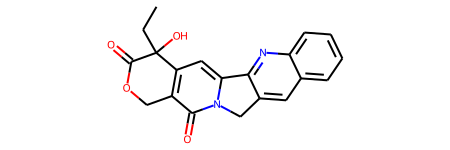

In [ ]:
this_smiles = list(df3.iloc[[23]].SMILES)[0]
show_structure(this_smiles, show_smiles =True)

Smiles : CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(C=C6C(=C5)C78CCN9C7C(C=CC9)(C(C(C8N6C)(C(=O)OC)O)OC(=O)C)CC)OC)C(=O)OC)O


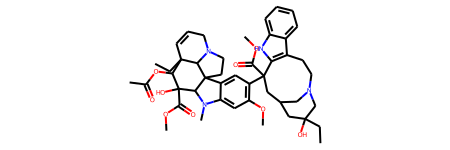

In [ ]:
this_smiles = list(df3.iloc[[1213]].SMILES)[0]
show_structure(this_smiles, show_smiles =True)  ## ewq

In [ ]:
class ECFP6:
    def __init__(self, smiles):
        self.mols = [Chem.MolFromSmiles(i) for i in smiles]
        self.smiles = smiles

    def mol2fp(self, mol, fp_length, radius = 3):
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius = radius, nBits = fp_length)
        array = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, array)
        return array

    def compute_ECFP6(self, fp_length, name = None, generate_df = True):
        bit_headers = ['bit' + str(i) for i in range(fp_length)]
        arr = np.empty((0,fp_length), int).astype(int)
        for i in self.mols:
            fp = self.mol2fp(i, fp_length)
            arr = np.vstack((arr, fp))
        if (not generate_df):
            return np.asarray(arr).astype(int)
        df_ecfp6 = pd.DataFrame(np.asarray(arr).astype(int),columns=bit_headers)
        df_ecfp6.insert(loc=0, column='smiles', value=self.smiles)
        if name != None:
            df_ecfp6.to_csv(name[:-4]+'_ECFP6.csv', index=False)
        
        return df_ecfp6
smiles = [standardize_smiles(i) for i in unique_smiles] 
convert_to_nonstd = dict(zip(smiles, unique_smiles)) 


ecfp6_descriptor = ECFP6(smiles)        
df6 = ecfp6_descriptor.compute_ECFP6(fp_length = 1024)

In [ ]:
smiles = [standardize_smiles(i) for i in [unique_smiles[0]]] 
convert_to_nonstd = dict(zip(smiles, [unique_smiles[0]])) 

ecfp6_descriptor = ECFP6(smiles)        
df_X = ecfp6_descriptor.compute_ECFP6(fp_length = 1024) 
df_X

,smiles,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,bit9,bit10,bit11,bit12,bit13,bit14,bit15,bit16,bit17,bit18,bit19,bit20,bit21,bit22,bit23,bit24,bit25,bit26,bit27,bit28,bit29,bit30,bit31,bit32,bit33,bit34,bit35,bit36,bit37,bit38,...,bit984,bit985,bit986,bit987,bit988,bit989,bit990,bit991,bit992,bit993,bit994,bit995,bit996,bit997,bit998,bit999,bit1000,bit1001,bit1002,bit1003,bit1004,bit1005,bit1006,bit1007,bit1008,bit1009,bit1010,bit1011,bit1012,bit1013,bit1014,bit1015,bit1016,bit1017,bit1018,bit1019,bit1020,bit1021,bit1022,bit1023
0,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("df6")
print()
unique_smiles_df6 = list(Counter(df6["smiles"].tolist()).keys())
print(f"unique_smiles_df6 = {len(unique_smiles_df6)}")
print()
print(f"df6 Length = {len(df6)}")
df5.head()

df6

unique_smiles_df6 = 223

df6 Length = 223


,drug_name,drug_id,Cell line name,cosmic_sample_id,TCGA classification,Tissue,Tissue sub-type,IC Result ID,IC50,AUC,Max conc,RMSE,Z score,Dataset version,CID,SMILES
0,Erlotinib,1,MC-CAR,683665,MM,blood,haematopoietic_neoplasm_other,112389,2.436586,0.982484,2.0,0.021894,-0.013193,17,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
1,Erlotinib,1,ES3,684055,UNCLASSIFIED,bone,ewings_sarcoma,46076,3.342826,0.984986,2.0,0.030357,0.777474,17,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
2,Erlotinib,1,ES5,684057,UNCLASSIFIED,bone,ewings_sarcoma,46573,3.571787,0.982939,2.0,0.031807,0.977236,17,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
3,Erlotinib,1,ES7,684059,UNCLASSIFIED,bone,ewings_sarcoma,47103,3.185231,0.984292,2.0,0.094084,0.639977,17,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
4,Erlotinib,1,EW-11,684062,UNCLASSIFIED,bone,ewings_sarcoma,49007,2.462555,0.946649,2.0,0.087727,0.009464,17,176870,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...


In [ ]:
smiles = [standardize_smiles(i) for i in unique_smiles] 
convert_to_nonstd = dict(zip(smiles, unique_smiles)) 

ecfp6_descriptor = ECFP6(smiles)     
df7 = ecfp6_descriptor.compute_ECFP6(fp_length = 2048//2)

In [ ]:
print("df7")
print()
unique_smiles_df7 = list(Counter(df7["smiles"].tolist()).keys())
print(f"unique_smiles = {len(unique_smiles)}")
print()
print(f"df7 Length = {len(df7)}")
df6.head()

df7

unique_smiles = 223

df7 Length = 223


,smiles,bit0,bit1,bit2,bit3,bit4,bit5,bit6,bit7,bit8,bit9,bit10,bit11,bit12,bit13,bit14,bit15,bit16,bit17,bit18,bit19,bit20,bit21,bit22,bit23,bit24,bit25,bit26,bit27,bit28,bit29,bit30,bit31,bit32,bit33,bit34,bit35,bit36,bit37,bit38,...,bit984,bit985,bit986,bit987,bit988,bit989,bit990,bit991,bit992,bit993,bit994,bit995,bit996,bit997,bit998,bit999,bit1000,bit1001,bit1002,bit1003,bit1004,bit1005,bit1006,bit1007,bit1008,bit1009,bit1010,bit1011,bit1012,bit1013,bit1014,bit1015,bit1016,bit1017,bit1018,bit1019,bit1020,bit1021,bit1022,bit1023
0,C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,COC1CC2CCC(C)C(O)(O2)C(=O)C(=O)N2CCCCC2C(=O)OC...,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)c...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cc1[nH]c(C=C2C(=O)Nc3ccc(S(=O)(=O)Cc4c(Cl)cccc...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## utils.py

In [ ]:
import os
import numpy as np
from math import sqrt
from scipy import stats

from torch_geometric.data import InMemoryDataset, DataLoader
from torch_geometric import data as DATA

import torch
import matplotlib.pyplot as plt  

    # train_data = TestbedDataset(root='data', dataset=dataset+'_train_mix', xd=xd_train, xt=xc_train, y=y_train, smile_graph=smile_graph)
    # val_data = TestbedDataset(root='data', dataset=dataset+'_val_mix', xd=xd_val, xt=xc_val, y=y_val, smile_graph=smile_graph)
    # test_data = TestbedDataset(root='data', dataset=dataset+'_test_mix', xd=xd_test, xt=xc_test, y=y_test, smile_graph=smile_graph)

class TestbedDataset(InMemoryDataset):
    def __init__(self, root='gdrive/MyDrive/FYP/Data/DRP/root_folder', dataset='davis', 
                 xd=None, xt=None, y=None, transform=None,
                 pre_transform=None,smile_graph=None,saliency_map=False, testing = False):

        #root is required for save preprocessed data, default is '/tmp'
        super(TestbedDataset, self).__init__(root, transform, pre_transform)
        # benchmark dataset, default = 'davis'
        self.dataset = dataset
        self.saliency_map = saliency_map
        self.testing  = testing 

        if (self.testing):
            self.process(xd, xt, y,smile_graph)
        elif os.path.isfile(self.processed_paths[0]):
            print('Pre-processed data found: {}, loading ...'.format(self.processed_paths[0]))
            self.data, self.slices = torch.load(self.processed_paths[0])
        else:
            print('Pre-processed data {} not found, doing pre-processing...'.format(self.processed_paths[0]))
            self.process(xd, xt, y,smile_graph)
            self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        pass
        #return ['some_file_1', 'some_file_2', ...]

    @property
    def processed_file_names(self):
        return [self.dataset + '.pt']

    def download(self):
        # Download to `self.raw_dir`.
        pass

    def _download(self):
        pass

    def _process(self):
        if not os.path.exists(self.processed_dir):
            os.makedirs(self.processed_dir)

    def process(self, xd, xt, y, smile_graph):    
        ## xd : smile, 
        ## cx : np array of 735 mutation values, 
        ## y : IC50 value
        ## smile_graph : dictionary keys : smile, and values : 4_drug_outputs (num of mols, 72 features, edges, graph)


        assert (len(xd) == len(xt) and len(xt) == len(y)), "The three lists must be the same length!"
        data_list = []
        data_len = len(xd)
        for i in range(data_len):
            
            if ((i%2000 == 0 or i+1 == data_len) and (not self.testing)):
                print('Converting SMILES to graph: {}/{}'.format(i+1, data_len))
            smiles = xd[i]
            target = xt[i]
            labels = y[i]

            c_size, features, edge_index, edge_features, this_graph = smile_graph[smiles]
            # make the graph ready for PyTorch Geometrics GCN algorithms: 
            
            if (self.testing):  
                ptr_F =torch.tensor([0, int(c_size)])
                batch_F = torch.zeros((int(c_size)), dtype = int)                             
                GCNData = DATA.Data(x=torch.Tensor(features),                                       
                                    edge_index=torch.LongTensor(edge_index).transpose(1, 0),        
                                    y=torch.FloatTensor([labels]), batch = batch_F, ptr = ptr_F)                                   
            else:
                GCNData = DATA.Data(x=torch.Tensor(features),                                       ## rid_00
                                    edge_index=torch.LongTensor(edge_index).transpose(1, 0),        ## rid_01
                                    edge_features=torch.Tensor(edge_features), 
                                    y=torch.FloatTensor([labels]))                                  ## rid_02   tensor([0.6563]) 

            
            # require_grad of cell-line for saliency map
            if self.saliency_map == True:
                GCNData.target = torch.tensor([target], dtype=torch.float, requires_grad=True)
            else:
                GCNData.target = torch.FloatTensor([target])                                     ## rid_03

            GCNData.__setitem__('c_size', torch.LongTensor([c_size]))
            # append graph, label and target sequence to data list
            data_list.append(GCNData)

        if (self.testing):
            ptr_F =torch.tensor([0, int(c_size)])
            batch_F = torch.zeros((int(c_size)), dtype = int)

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        if (self.testing):
            return data_list  ## nico utils

        print('Graph construction done. Saving to file.')
        bts = sys.getsizeof(data_list)
        print(f"data_list: {bts} bytes")
        print(f"data_list: {bts/1000000} mb")
        print(f"data_list: {bts/1000000000} gb")
        print(f"len(data_list): {len(data_list)}")
        print(f"type(data_list[0]): {type(data_list[0])}")
        data, slices = self.collate(data_list)

        if (self.testing):
            return (data, slices)  ## nico utils

        print(" Saved to file.")
        # save preprocessed data:
        torch.save((data, slices), self.processed_paths[0])
        print(" Complete.")

    def getXD(self):
        return self.xd

def rmse(y,f):
    rmse = sqrt(((y - f)**2).mean(axis=0))
    return rmse
def mse(y,f):
    mse = ((y - f)**2).mean(axis=0)
    return mse
def pearson(y,f):
    rp = np.corrcoef(y, f)[0,1]
    return rp
def spearman(y,f):
    rs = stats.spearmanr(y, f)[0]
    return rs
def ci(y,f):
    ind = np.argsort(y)
    y = y[ind]
    f = f[ind]
    i = len(y)-1
    j = i-1
    z = 0.0
    S = 0.0
    while i > 0:
        while j >= 0:
            if y[i] > y[j]:
                z = z+1
                u = f[i] - f[j]
                if u > 0:
                    S = S + 1
                elif u == 0:
                    S = S + 0.5
            j = j - 1
        i = i - 1
        j = i-1
    ci = S/z
    return ci

def draw_loss(train_losses, test_losses, title):
    plt.figure()
    plt.plot(train_losses, label='train loss')
    plt.plot(test_losses, label='test loss')

    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # save image
    plt.savefig(title+".png")

def draw_pearson(pearsons, title):
    plt.figure()
    plt.plot(pearsons, label='test pearson')

    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Pearson')
    plt.legend()
    # save image
    plt.savefig(title+".png")

## Models

### GCN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_max_pool as gmp

class GCNNet(torch.nn.Module):
    def __init__(self, n_output=1, n_filters=32, embed_dim=128,num_features_xd=192, num_features_xt=25, output_dim=128, dropout=0.5):  ## qwe

        super(GCNNet, self).__init__()

        # SMILES graph branch
        self.n_output = n_output
        self.conv1 = GCNConv(num_features_xd, num_features_xd)
        self.conv2 = GCNConv(num_features_xd, num_features_xd*2)
        self.conv3 = GCNConv(num_features_xd*2, num_features_xd * 4)
        self.fc_g1 = torch.nn.Linear(num_features_xd*4, 1024)
        self.fc_g2 = torch.nn.Linear(1024, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

        # cell line feature
        self.conv_xt_1 = nn.Conv1d(in_channels=1, out_channels=n_filters, kernel_size=8)
        self.pool_xt_1 = nn.MaxPool1d(3)
        self.conv_xt_2 = nn.Conv1d(in_channels=n_filters, out_channels=n_filters*2, kernel_size=8)
        self.pool_xt_2 = nn.MaxPool1d(3)
        self.conv_xt_3 = nn.Conv1d(in_channels=n_filters*2, out_channels=n_filters*4, kernel_size=8)
        self.pool_xt_3 = nn.MaxPool1d(3)
        self.fc1_xt = nn.Linear(2944, output_dim)

        # combined layers
        self.fc1 = nn.Linear(2*output_dim, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.out = nn.Linear(128, self.n_output)

    def forward(self, data):
        # get graph input
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        x = self.relu(x)
        x = self.conv3(x, edge_index)
        x = self.relu(x)
        x = gmp(x, batch)       # global max pooling

        # flatten
        x = self.relu(self.fc_g1(x))
        x = self.dropout(x)
        x = self.fc_g2(x)
        x = self.dropout(x)

        # get protein input
        target = data.target
        target = target[:,None,:]
        # 1d conv layers
        conv_xt = self.conv_xt_1(target)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_1(conv_xt)
        conv_xt = self.conv_xt_2(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_2(conv_xt)
        conv_xt = self.conv_xt_3(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_3(conv_xt)

        # flatten
        xt = conv_xt.view(-1, conv_xt.shape[1] * conv_xt.shape[2])
        xt = self.fc1_xt(xt)

        # concat
        xc = torch.cat((x, xt), 1)
        # add some dense layers
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        out = nn.Sigmoid()(out)
        return out, x

### GAT

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Sequential, Linear, ReLU
from torch_geometric.nn import GATConv
from torch_geometric.nn import global_max_pool as gmp
   
class GATNet(torch.nn.Module):
    def __init__(self, num_features_xd=192, n_output=1, num_features_xt=25, n_filters=32, embed_dim=128, output_dim=128, dropout=0.2):
        super(GATNet, self).__init__()

        # graph layers
        self.gcn1 = GATConv(num_features_xd, num_features_xd, heads=10, dropout=dropout)
        self.gcn2 = GATConv(num_features_xd * 10, output_dim, dropout=dropout)
        self.fc_g1 = nn.Linear(output_dim, output_dim)

        # cell line feature
        self.conv_xt_1 = nn.Conv1d(in_channels=1, out_channels=n_filters, kernel_size=8)
        self.pool_xt_1 = nn.MaxPool1d(3)
        self.conv_xt_2 = nn.Conv1d(in_channels=n_filters, out_channels=n_filters*2, kernel_size=8)
        self.pool_xt_2 = nn.MaxPool1d(3)
        self.conv_xt_3 = nn.Conv1d(in_channels=n_filters*2, out_channels=n_filters*4, kernel_size=8)
        self.pool_xt_3 = nn.MaxPool1d(3)
        self.fc1_xt = nn.Linear(2944, output_dim)

        # combined layers
        self.fc1 = nn.Linear(2*output_dim, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.out = nn.Linear(128, n_output)

        # activation and regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, data):
        # graph input feed-forward
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = F.dropout(x, p=0.2, training=self.training)
        x = F.elu(self.gcn1(x, edge_index))
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.gcn2(x, edge_index)
        x = self.relu(x)
        x = gmp(x, batch)          # global max pooling
        x = self.fc_g1(x)
        x = self.relu(x)

        # protein input feed-forward:
        target = data.target
        target = target[:,None,:]
        # 1d conv layers
        conv_xt = self.conv_xt_1(target)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_1(conv_xt)
        conv_xt = self.conv_xt_2(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_2(conv_xt)
        conv_xt = self.conv_xt_3(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_3(conv_xt)

        # flatten
        xt = conv_xt.view(-1, conv_xt.shape[1] * conv_xt.shape[2])
        xt = self.fc1_xt(xt)
        
        # concat                                                                
        xc = torch.cat((x, xt), 1)
        # add some dense layers
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        out = nn.Sigmoid()(out)
        return out, x

### GAT Edge

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Sequential, Linear, ReLU
from torch_geometric.nn import GATConv
from torch_geometric.nn import global_max_pool as gmp

    
class GATNet_E(torch.nn.Module):
    def __init__(self, num_features_xd=192, n_output=1, num_features_xt=25,
                     n_filters=32, embed_dim=128, output_dim=128, dropout=0.2):
        super(GATNet_E, self).__init__()

        # graph layers
        self.gcn1 = GATConv(num_features_xd, num_features_xd, heads=10, dropout=dropout, edge_dim = 4)
        self.gcn2 = GATConv(num_features_xd * 10, output_dim, dropout=dropout, edge_dim = 4)
        self.fc_g1 = nn.Linear(output_dim, output_dim)

        # cell line feature
        self.conv_xt_1 = nn.Conv1d(in_channels=1, out_channels=n_filters, kernel_size=8)
        self.pool_xt_1 = nn.MaxPool1d(3)
        self.conv_xt_2 = nn.Conv1d(in_channels=n_filters, out_channels=n_filters*2, kernel_size=8)
        self.pool_xt_2 = nn.MaxPool1d(3)
        self.conv_xt_3 = nn.Conv1d(in_channels=n_filters*2, out_channels=n_filters*4, kernel_size=8)
        self.pool_xt_3 = nn.MaxPool1d(3)
        self.fc1_xt = nn.Linear(2944, output_dim)

        # combined layers
        self.fc1 = nn.Linear(2*output_dim, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.out = nn.Linear(128, n_output)

        # activation and regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, data):
        # graph input feed-forward
        x, edge_index, batch, edge_feat = data.x, data.edge_index, data.batch, data.edge_features
        # print(data.x.shape)

        x = F.dropout(x, p=0.2, training=self.training)
        x = F.elu(self.gcn1(x, edge_index, edge_attr = edge_feat))
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.gcn2(x, edge_index, edge_attr = edge_feat)
        x = self.relu(x)
        x = gmp(x, batch)          # global max pooling
        x = self.fc_g1(x)
        x = self.relu(x)

        # protein input feed-forward:
        target = data.target
        target = target[:,None,:]
        # 1d conv layers
        conv_xt = self.conv_xt_1(target)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_1(conv_xt)
        conv_xt = self.conv_xt_2(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_2(conv_xt)
        conv_xt = self.conv_xt_3(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_3(conv_xt)

        # flatten
        xt = conv_xt.view(-1, conv_xt.shape[1] * conv_xt.shape[2])
        xt = self.fc1_xt(xt)
        
        # concat
        xc = torch.cat((x, xt), 1)
        # add some dense layers
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        out = nn.Sigmoid()(out)
        return out, x

### GATv2

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Sequential, Linear, ReLU
# from torch_geometric.nn import GATConv
from torch_geometric.nn import GATv2Conv
from torch_geometric.nn import global_max_pool as gmp
                                                                                                               

class GATv2Net(torch.nn.Module):
    def __init__(self, num_features_xd=78, n_output=1, num_features_xt=25,
                     n_filters=32, embed_dim=128, output_dim=128, dropout=0.2):
        super(GATv2Net, self).__init__()

        # graph layers
        self.gcn1 = GATv2Conv(num_features_xd, num_features_xd, heads=25, dropout=dropout, edge_dim = 4, add_self_loops  = False)
        self.gcn2 = GATv2Conv(num_features_xd * 25, output_dim, dropout=dropout, edge_dim = 4, add_self_loops  = False)
        self.fc_g1 = nn.Linear(output_dim, output_dim)

        # cell line feature
        self.conv_xt_1 = nn.Conv1d(in_channels=1, out_channels=n_filters, kernel_size=8)
        self.pool_xt_1 = nn.MaxPool1d(3)
        self.conv_xt_2 = nn.Conv1d(in_channels=n_filters, out_channels=n_filters*2, kernel_size=8)
        self.pool_xt_2 = nn.MaxPool1d(3)
        self.conv_xt_3 = nn.Conv1d(in_channels=n_filters*2, out_channels=n_filters*4, kernel_size=8)
        self.pool_xt_3 = nn.MaxPool1d(3)
        self.fc1_xt = nn.Linear(2944, output_dim)

        # combined layers
        self.fc1 = nn.Linear(2*output_dim, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.out = nn.Linear(128, n_output)

        # activation and regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, data):
        # graph input feed-forward
        x, edge_index, batch, edge_feat = data.x, data.edge_index, data.batch, data.edge_features
        # print(data.x.shape)

        x = F.dropout(x, p=0.2, training=self.training)
        x = F.elu(self.gcn1(x, edge_index, edge_attr = edge_feat))
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.gcn2(x, edge_index, edge_attr = edge_feat)
        x = self.relu(x)
        x = gmp(x, batch)          # global max pooling
        x = self.fc_g1(x)
        x = self.relu(x)

        # protein input feed-forward:
        target = data.target
        target = target[:,None,:]
        # 1d conv layers
        conv_xt = self.conv_xt_1(target)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_1(conv_xt)
        conv_xt = self.conv_xt_2(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_2(conv_xt)
        conv_xt = self.conv_xt_3(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_3(conv_xt)

        # flatten
        xt = conv_xt.view(-1, conv_xt.shape[1] * conv_xt.shape[2])
        xt = self.fc1_xt(xt)
        
        # concat
        xc = torch.cat((x, xt), 1)
        # add some dense layers
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        out = nn.Sigmoid()(out)
        return out, x

### GSG

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# from torch_geometric.nn import GCNConv, global_max_pool as gmp
from torch_geometric.nn import SAGEConv, global_max_pool as gmp

## CLASSGCNConv(in_channels: int, out_channels: int, improved: bool = False, cached: bool = False, add_self_loops: bool = True, normalize: bool = True, bias: bool = True, **kwargs)
## CLASSSAGEConv(in_channels: Union[int, Tuple[int, int]], out_channels: int, normalize: bool = False, root_weight: bool = True, bias: bool = True, **kwargs)

class SAGENet(torch.nn.Module):
    def __init__(self, n_output=1, n_filters=32, embed_dim=128,num_features_xd=192, num_features_xt=25, output_dim=128, dropout=0.5):  ## qwe

        super(SAGENet, self).__init__()

        # SMILES graph branch

        # GCNSAGE
        self.n_output = n_output
        self.conv1 = SAGEConv(num_features_xd, num_features_xd)
        self.conv2 = SAGEConv(num_features_xd, num_features_xd*2)
        self.conv3 = SAGEConv(num_features_xd*2, num_features_xd * 4)
        self.fc_g1 = torch.nn.Linear(num_features_xd*4, 1024)
        self.fc_g2 = torch.nn.Linear(1024, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        
        # # GATSAGE
        # self.gcn1 = SAGEConv(num_features_xd, num_features_xd)
        # # self.gcn2 = SAGEConv(num_features_xd * 10, output_dim)
        # self.gcn2 = SAGEConv(num_features_xd, output_dim)
        # self.fc_g1 = nn.Linear(output_dim, output_dim)


        # cell line feature
        self.conv_xt_1 = nn.Conv1d(in_channels=1, out_channels=n_filters, kernel_size=8)
        self.pool_xt_1 = nn.MaxPool1d(3)
        self.conv_xt_2 = nn.Conv1d(in_channels=n_filters, out_channels=n_filters*2, kernel_size=8)
        self.pool_xt_2 = nn.MaxPool1d(3)
        self.conv_xt_3 = nn.Conv1d(in_channels=n_filters*2, out_channels=n_filters*4, kernel_size=8)
        self.pool_xt_3 = nn.MaxPool1d(3)
        self.fc1_xt = nn.Linear(2944, output_dim)

        # combined layers
        self.fc1 = nn.Linear(2*output_dim, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.out = nn.Linear(128, n_output)

        # activation and regularization
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, data):
        # get graph input
        x, edge_index, batch = data.x, data.edge_index, data.batch

        # GCNSAGE
        x = self.conv1(x, edge_index)
        x = self.relu(x)
        x = self.conv2(x, edge_index)
        x = self.relu(x)
        x = self.conv3(x, edge_index)
        x = self.relu(x)
        x = gmp(x, batch)       # global max pooling
        # flatten
        x = self.relu(self.fc_g1(x))
        x = self.dropout(x)
        x = self.fc_g2(x)
        x = self.dropout(x)

        # # GATSAGE
        # x = F.dropout(x, p=0.2, training=self.training)
        # x = F.elu(self.gcn1(x, edge_index))
        # x = F.dropout(x, p=0.2, training=self.training)
        # x = self.gcn2(x, edge_index)     ## RuntimeError: mat1 and mat2 shapes cannot be multiplied (32363x192 and 1920x128)
        # x = self.relu(x)
        # x = gmp(x, batch)          # global max pooling
        # x = self.fc_g1(x)
        # x = self.relu(x)


        # get protein input
        target = data.target
        target = target[:,None,:]
        # 1d conv layers
        conv_xt = self.conv_xt_1(target)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_1(conv_xt)
        conv_xt = self.conv_xt_2(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_2(conv_xt)
        conv_xt = self.conv_xt_3(conv_xt)
        conv_xt = F.relu(conv_xt)
        conv_xt = self.pool_xt_3(conv_xt)



        # flatten
        xt = conv_xt.view(-1, conv_xt.shape[1] * conv_xt.shape[2])
        xt = self.fc1_xt(xt)

        # concat
        xc = torch.cat((x, xt), 1)
        # add some dense layers
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        out = nn.Sigmoid()(out)
        return out, x

## Initialsing 

Run all cells in this section to initialise the data in a root folder

root_folder Location : gdrive/MyDrive/FYP/Data/DRP/root_folder/

root_folder contains branches names for example : "root_005"

Last three character is the index of the root.


A new branch name might have to be created. The below code will suggest an index.

The final data will be stored in branch_folder. For example

branch_folder : gdrive/MyDrive/FYP/Data/DRP/root_folder/root_005 

In [ ]:
print(os.listdir(root_folder))

['root_001', 'root_002', 'root_003', 'root_004', 'root_005', 'root_006', 'root_007', 'root_008', 'root_009', 'root_010', 'root_011', 'root_012', 'root_013', 'root_014', 'root_015', 'root_016', 'root_017', 'root_018', 'processed', 'root_019', 'root_020', 'root_021', 'root_022', 'root_023', 'root_024', 'root_025', 'root_026', 'root_027']


In [ ]:
dataset_X = "GDSC"  
branch_name = "root_028"

check_duplicate = False
if (check_duplicate):
  if (branch_name in os.listdir(root_folder)):
    new_fol_str = str(max([int(fol[-3:]) for fol in os.listdir(root_folder)]) + 1)
    print(f"new_fol_str = {new_fol_str}")
    while (len(new_fol_str) < 3):
      new_fol_str = "0" + new_fol_str 
    new_fol_str = "root_" + new_fol_str
    print(f"root_folder = {root_folder}")
    raise ValueError(f'{branch_name} already exists in the folder {root_folder}. Try naming the folder : {new_fol_str}')

branch_folder = root_folder + branch_name
branch_folder

'gdrive/MyDrive/FYP/Data/DRP/root_folder/root_028'

In [ ]:
do_mol_ecfp = False
fpl = None
do_edge_features = True
do_atom_ecfp = False
ecfp_radius = 3
use_radius = None

drug_dict_X, drug_smile_X, smile_graph_X = load_drug_smile_X(do_mol_ecfp, fpl, do_edge_features, do_atom_ecfp, ecfp_radius, use_radius)
xd_X, xc_X, y_X = save_mix_drug_cell_matrix_X(do_mol_ecfp, fpl, do_edge_features, do_atom_ecfp, ecfp_radius, use_radius)    

preparing  GDSC_train.pt in pytorch format!


In [ ]:
randomize = False
seed = 19871729 ## 19871729

if (randomize):
    np.random.seed(seed)
    np.random.shuffle(xd_X)

    np.random.seed(seed)
    np.random.shuffle(xc_X)

    np.random.seed(seed)
    np.random.shuffle(y_X)

size_X = int(xd_X.shape[0] * 0.8)
size1_X = int(xd_X.shape[0] * 0.9)

xd_train_X = xd_X[:size_X]
xd_test_X = xd_X[size_X:size1_X]
xd_val_X = xd_X[size1_X:]

xc_train_X = xc_X[:size_X]
xc_test_X = xc_X[size_X:size1_X]
xc_val_X = xc_X[size1_X:]

y_train_X = y_X[:size_X]
y_test_X = y_X[size_X:size1_X]
y_val_X = y_X[size1_X:]

print(f"xd_X.shape[0] = {xd_X.shape[0]}")
print(f"size_X = {size_X}")
print(f"size1_X = {size1_X}")
print()
print(f"xd_train_X = {xd_train_X.shape}")
print(f"xd_val_X = {xd_val_X.shape}")
print(f"xd_test_X = {xd_test_X.shape}")
print()
print(f"xc_train_X = {xc_train_X.shape}")
print(f"xc_val_X = {xc_val_X.shape}")
print(f"xc_test_X = {xc_test_X.shape}")
print()
print(f"y_train_X = {y_train_X.shape}")
print(f"y_val_X = {y_val_X.shape}")
print(f"y_test_X = {y_test_X.shape}")


dataset_X = 'GDSC'
print('preparing ', dataset_X + '_train.pt in pytorch format!')                         ## 

xd_X.shape[0] = 191049
size_X = 152839
size1_X = 171944

xd_train_X = (152839,)
xd_val_X = (19105,)
xd_test_X = (19105,)

xc_train_X = (152839, 735)
xc_val_X = (19105, 735)
xc_test_X = (19105, 735)

y_train_X = (152839,)
y_val_X = (19105,)
y_test_X = (19105,)
preparing  GDSC_train.pt in pytorch format!


In [ ]:
this_branch = branch_name
train_data = TestbedDataset(root='gdrive/MyDrive/FYP/Data/DRP/root_folder/'+ this_branch, dataset=dataset_X+'_train_mix', xd=xd_train_X, xt=xc_train_X, y=y_train_X, smile_graph=smile_graph_X)
val_data = TestbedDataset(root='gdrive/MyDrive/FYP/Data/DRP/root_folder/' + this_branch, dataset=dataset_X+'_val_mix', xd=xd_val_X, xt=xc_val_X, y=y_val_X, smile_graph=smile_graph_X)
test_data = TestbedDataset(root='gdrive/MyDrive/FYP/Data/DRP/root_folder/'+ this_branch, dataset=dataset_X+'_test_mix', xd=xd_test_X, xt=xc_test_X, y=y_test_X, smile_graph=smile_graph_X)

## Training

In [ ]:
save_folder = "gdrive/MyDrive/FYP/Saves/GATv2/"
save_name = "GATv2-EP300-RS19871729-ECFP6A192"
branch_folder = "gdrive/MyDrive/FYP/Data/DRP/root_folder/root_028"

modeling = GATv2
train_batch = 1024
val_batch = 1024
test_batch = 1024
lr = 1e-4  
num_epoch = 300
log_interval = 20
cuda_name = 0
print(f"branch_folder = {branch_folder}")
main(modeling, train_batch, val_batch, test_batch, lr, num_epoch, log_interval, cuda_name, br_fol = branch_folder, save_folder = save_folder, save_name = save_name, do_save = True)

## Testing

In [ ]:
save_folder = "gdrive/MyDrive/FYP/Saves/"

In [ ]:
os.listdir(save_folder)

['GSG-EP300-ECFP6_0', 'GSG-EP300-ECFP6_300']

In [ ]:
# model = SAGENet(n_output=1, n_filters=32, embed_dim=128,num_features_xd=78, num_features_xt=25, output_dim=128, dropout=0.5)
model = SAGENet()
model.load_state_dict(torch.load(save_folder+"GSG-EP300-ECFP6_300/"+"model_SAGENet_GDSC.model"))
# model.eval()

<All keys matched successfully>

In [ ]:
i = 24873 ## 24872
test_smiles = df5.loc[i].SMILES
test_cid = df5.loc[i].cosmic_sample_id
test_ic50 = df5.loc[i].IC50
print(f"test_smiles = {test_smiles}")
print(f"test_cid = {test_cid}")
print(f"test_ic50 = {test_ic50} <> {norm_ic50(test_ic50)}")
pred = predict_this(mdl = model, sml = test_smiles, cid = test_cid, do_ECFP = True, fpl = 300)
print(f"predicted ic50 = {pred} <> {norm_ic50(pred)}")

test_smiles = C1CC2=C(C1)C=C(C=C2)OC3=NC4=C(C(=N3)NC(CC5=CC=CC=C5)CO)N=CN4CC6=CC=C(C=C6)C7=CC=CC=C7
test_cid = 908158
test_ic50 = 1.27659564 <> 0.5318716185330629
predicted ic50 = 1.8946497345477578 <> 0.5472250580787659


In [ ]:
df5.iloc[[24871, 24872, 24873]]

,drug_name,drug_id,Cell line name,cosmic_sample_id,TCGA classification,Tissue,Tissue sub-type,IC Result ID,IC50,AUC,Max conc,RMSE,Z score,Dataset version,CID,SMILES
24871,QS11,151,MSTO-211H,908152,MESO,lung,mesothelioma,125795,4.660151,0.990294,10.24,0.029529,0.963574,17,42623900,C1CC2=C(C1)C=C(C=C2)OC3=NC4=C(C(=N3)NC(CC5=CC=...
24872,QS11,151,MV-4-11,908156,UNCLASSIFIED,blood,leukemia,126041,1.745154,0.849700,10.24,0.040397,-1.097210,17,42623900,C1CC2=C(C1)C=C(C=C2)OC3=NC4=C(C(=N3)NC(CC5=CC=...
24873,QS11,151,NALM-6,908158,UNCLASSIFIED,blood,B_cell_leukemia,127287,1.276596,0.782732,10.24,0.069418,-1.428462,17,42623900,C1CC2=C(C1)C=C(C=C2)OC3=NC4=C(C(=N3)NC(CC5=CC=...
